In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [445]:
# create a function that takes a directory as input and 
# spits out the mean firing rates and standard errors for each population

def getRatesAndErrs(filedir,duration,window,distrad):
    
    '''
    gets firing rates and errors by counting spikes over a simulation of
    total length 'duration' milliseconds in windows of time with width 'window' ms.
    'numChr2' is the total number of ChR2 stimulations
    '''
#     f = 1000/(window*numChr2) # factor to multiply spike counts by to get firing rates in Hz
    
    with open('%s/all_spikes.pickle'%filedir, 'rb') as file:
        all_spikes = pickle.load(file)
    
    control_times = []
    chr_times = []
    ii = 0
    is_control = True
    while True:
        start_time = ii * 500
        stop_time = start_time + window # 40
        if is_control:
            control_times.append(start_time)
        else:
            chr_times.append(start_time)   
        ii += 1
        if is_control:
            is_control = False
        else:
            is_control = True        
        if stop_time > duration: break
    f = 1000/(window*len(chr_times)) # factor to multiply spike counts by to get firing rates in Hz
            
    population_spikes = []
    exc_positions = np.load('%s/exc_positions.npy'%filedir)        
    chr2_spikes = []
    Nneurons  = 0
    for ni in range(8000):
        pos_x, pos_y, pos_z = exc_positions[:,ni]
        dist = np.sqrt((0.5-pos_x)**2 + (0.5-pos_y)**2)
        if dist > distrad: # only want activity local to the center
            continue
        Nneurons += 1
        nspikes = 0
        for tim in chr_times:
            aa = all_spikes[ni] [all_spikes[ni] > tim ]
            aa = aa [aa < tim+window]
            nspikes += len(aa)
        chr2_spikes.append(nspikes*f)     
    print(Nneurons, 'excitatory neurons found')
    excMean = np.mean(chr2_spikes)
    excSEM = stats.sem(chr2_spikes)
    population_spikes += chr2_spikes
    
    pv_positions = np.load('%s/pv_positions.npy'%filedir)
    chr2_spikes = []
    for ni in range(1000):        
        pos_x, pos_y, pos_z = pv_positions[:,ni]
        dist = np.sqrt((0.5-pos_x)**2 + (0.5-pos_y)**2)
        if dist > distrad:
            continue
        
        nspikes = 0
        for tim in chr_times:
            aa = all_spikes[ni+8000] [all_spikes[ni+8000] > tim ]
            aa = aa [aa < tim+window]
            nspikes += len(aa)
        chr2_spikes.append(nspikes*f)
        
    pvMean = np.mean(chr2_spikes)
    pvSEM = stats.sem(chr2_spikes)   
    population_spikes += chr2_spikes
    
    sst_positions = np.load('%s/som_positions.npy'%filedir)
    chr2_spikes = []
    for ni in range(1000):
        
        pos_x, pos_y, pos_z = sst_positions[:,ni]
        dist = np.sqrt((0.5-pos_x)**2 + (0.5-pos_y)**2)
        if dist > distrad:
            continue
        
        nspikes = 0
        for tim in chr_times:
            aa = all_spikes[ni+9000] [all_spikes[ni+9000] > tim ]
            aa = aa [aa < tim+window]
            nspikes += len(aa)
        chr2_spikes.append(nspikes*f)
    population_spikes += chr2_spikes
    
    somMean = np.mean(chr2_spikes)
    somSEM = stats.sem(chr2_spikes)
    
    means = [excMean, pvMean, somMean, np.mean(population_spikes)]
    SEMs = [excSEM, pvSEM, somSEM, stats.sem(population_spikes)]
    return [means, SEMs]

In [446]:
# create a function that takes a directory as input and 
# spits out the mean firing rates and standard errors for each population
def getDistCorner(pos_x, pos_y):
    d1 = np.sqrt((0.0-pos_x)**2 + (0.0-pos_y)**2)
    d2 = np.sqrt((0.0-pos_x)**2 + (1.0-pos_y)**2)
    d3 = np.sqrt((1.0-pos_x)**2 + (0.0-pos_y)**2)
    d4 = np.sqrt((1.0-pos_x)**2 + (1.0-pos_y)**2)
    return np.min([d1,d2,d3,d4])
    
def getRatesAndErrsDistal(filedir,duration,window):
    '''
    gets firing rates and errors by counting spikes over a simulation of
    total length 'duration' milliseconds in windows of time with width 'window' ms.
    'numChr2' is the total number of ChR2 stimulations
    '''
#     f = 1000/(window*numChr2) # factor to multiply spike counts by to get firing rates in Hz
    
    with open('%s/all_spikes.pickle'%filedir, 'rb') as file:
        all_spikes = pickle.load(file)
    
    control_times = []
    chr_times = []
    ii = 0
    is_control = True
    while True:
        start_time = ii * 500
        stop_time = start_time + window # 40
        if is_control:
            control_times.append(start_time)
        else:
            chr_times.append(start_time)   
        ii += 1
        if is_control:
            is_control = False
        else:
            is_control = True        
        if stop_time > duration: break
    f = 1000/(window*len(chr_times)) # factor to multiply spike counts by to get firing rates in Hz
            
    exc_positions = np.load('%s/exc_positions.npy'%filedir)        
    chr2_spikes = []
    population_spikes = []
    Nneurons = 0
    for ni in range(8000):
        pos_x, pos_y, pos_z = exc_positions[:,ni]
        dist = getDistCorner(pos_x, pos_y)
        if dist > 0.2: # only want activity local to the center
            continue
        Nneurons +=1
        nspikes = 0
        for tim in chr_times:
            aa = all_spikes[ni] [all_spikes[ni] > tim ]
            aa = aa [aa < tim+window]
            nspikes += len(aa)
        chr2_spikes.append(nspikes*f)   
    print(Nneurons, 'excitatory neurons found')
    excMean = np.mean(chr2_spikes)
    excSEM = stats.sem(chr2_spikes)
    population_spikes += chr2_spikes
            
    pv_positions = np.load('%s/pv_positions.npy'%filedir)
    chr2_spikes = []
    for ni in range(1000):        
        pos_x, pos_y, pos_z = pv_positions[:,ni]
        dist = getDistCorner(pos_x, pos_y)
        if dist > 0.2:
            continue
        
        nspikes = 0
        for tim in chr_times:
            aa = all_spikes[ni+8000] [all_spikes[ni+8000] > tim ]
            aa = aa [aa < tim+window]
            nspikes += len(aa)
        chr2_spikes.append(nspikes*f)
        
    pvMean = np.mean(chr2_spikes)
    pvSEM = stats.sem(chr2_spikes)   
    population_spikes += chr2_spikes
    
    sst_positions = np.load('%s/som_positions.npy'%filedir)
    chr2_spikes = []
    for ni in range(1000):
        
        pos_x, pos_y, pos_z = sst_positions[:,ni]
        dist = getDistCorner(pos_x, pos_y)
        if dist > 0.2:
            continue
        
        nspikes = 0
        for tim in chr_times:
            aa = all_spikes[ni+9000] [all_spikes[ni+9000] > tim ]
            aa = aa [aa < tim+window]
            nspikes += len(aa)
        chr2_spikes.append(nspikes*f)
        
    somMean = np.mean(chr2_spikes)
    somSEM = stats.sem(chr2_spikes)
    population_spikes += chr2_spikes
    
#     means = [excMean, pvMean, somMean]
#     SEMs = [excSEM, pvSEM, somSEM]
    means = [excMean, pvMean, somMean, np.mean(population_spikes)]
    SEMs = [excSEM, pvSEM, somSEM, stats.sem(population_spikes)]
    return [means, SEMs]

In [447]:
def getRatesAndErrsControl(filedir,duration,window,distrad):
    '''
    gets firing rates and errors by counting spikes over a simulation of
    total length 'duration' milliseconds in windows of time with width 'window' ms.
    'numChr2' is the total number of ChR2 stimulations
    '''
    
    
    with open('%s/all_spikes.pickle'%filedir, 'rb') as file:
        all_spikes = pickle.load(file)
    
    control_times = []
    chr_times = []
    ii = 0
    is_control = True
    while True:
        start_time = ii * 500
        stop_time = start_time + window # 40
        if is_control:
            control_times.append(start_time)
        else:
            chr_times.append(start_time)   
        ii += 1
        if is_control:
            is_control = False
        else:
            is_control = True        
        if stop_time > duration: break
            
    f = 1000/(window*len(control_times)) # factor to multiply spike counts by to get firing rates in Hz
            
    exc_positions = np.load('%s/exc_positions.npy'%filedir)        
    chr2_spikes = []
    population_spikes = []
    for ni in range(8000):
        pos_x, pos_y, pos_z = exc_positions[:,ni]
        dist = np.sqrt((0.5-pos_x)**2 + (0.5-pos_y)**2)
        if dist > distrad: # only want activity local to the center
            continue
        
        nspikes = 0
        for tim in control_times:
            aa = all_spikes[ni] [all_spikes[ni] > tim ]
            aa = aa [aa < tim+window]
            nspikes += len(aa)
        chr2_spikes.append(nspikes*f)       
    excMean = np.mean(chr2_spikes)
    excSEM = stats.sem(chr2_spikes)
    population_spikes += chr2_spikes
            
    pv_positions = np.load('%s/pv_positions.npy'%filedir)
    chr2_spikes = []
    for ni in range(1000):        
        pos_x, pos_y, pos_z = pv_positions[:,ni]
        dist = np.sqrt((0.5-pos_x)**2 + (0.5-pos_y)**2)
        if dist > distrad:
            continue
        
        nspikes = 0
        for tim in control_times:
            aa = all_spikes[ni+8000] [all_spikes[ni+8000] > tim ]
            aa = aa [aa < tim+window]
            nspikes += len(aa)
        chr2_spikes.append(nspikes*f)
        
    pvMean = np.mean(chr2_spikes)
    pvSEM = stats.sem(chr2_spikes)   
    population_spikes += chr2_spikes
    
    sst_positions = np.load('%s/som_positions.npy'%filedir)
    chr2_spikes = []
    for ni in range(1000):
        
        pos_x, pos_y, pos_z = sst_positions[:,ni]
        dist = np.sqrt((0.5-pos_x)**2 + (0.5-pos_y)**2)
        if dist > distrad:
            continue
        
        nspikes = 0
        for tim in control_times:
            aa = all_spikes[ni+9000] [all_spikes[ni+9000] > tim ]
            aa = aa [aa < tim+window]
            nspikes += len(aa)
        chr2_spikes.append(nspikes*f)
        
    somMean = np.mean(chr2_spikes)
    somSEM = stats.sem(chr2_spikes)
    population_spikes += chr2_spikes
    
    means = [excMean, pvMean, somMean, np.mean(population_spikes)]
    SEMs = [excSEM, pvSEM, somSEM, stats.sem(population_spikes)]
    return [means, SEMs]

In [240]:
# create a function that takes a directory as input and 
# spits out the mean firing rates and standard errors for each population

def getDistCorner(pos_x, pos_y):
    if pos_x < 0.5 and pos_y < 0.5:
        return np.sqrt((0.0-pos_x)**2 + (0.0-pos_y)**2)
    elif pos_x < 0.5 and pos_y >= 0.5:
        return np.sqrt((0.0-pos_x)**2 + (1.0-pos_y)**2)
    elif pos_x >= 0.5 and pos_y < 0.5:
        return np.sqrt((1.0-pos_x)**2 + (0.0-pos_y)**2)
    elif pos_x >= 0.5 and pos_y >= 0.5:
        return np.sqrt((1.0-pos_x)**2 + (1.0-pos_y)**2)
    else:
        raise Exception()

def getRatesAndErrs_dist(filedir,duration,window,numChr2):
    '''
    gets firing rates and errors by counting spikes over a simulation of
    total length 'duration' milliseconds in windows of time with width 'window' ms.
    'numChr2' is the total number of ChR2 stimulations
    '''
    f = 1000/(window*numChr2) # factor to multiply spike counts by to get firing rates in Hz
    
    with open('%s/all_spikes.pickle'%filedir, 'rb') as file:
        all_spikes = pickle.load(file)
    
    control_times = []
    chr_times = []
    ii = 0
    is_control = True
    while True:
        start_time = ii * 500
        stop_time = start_time + window # 40
        if is_control:
            control_times.append(start_time)
        else:
            chr_times.append(start_time)   
        ii += 1
        if is_control:
            is_control = False
        else:
            is_control = True        
        if stop_time > duration: break
            
    exc_positions = np.load('%s/exc_positions.npy'%filedir)        
    chr2_spikes = []
    for ni in range(8000):
        pos_x, pos_y, pos_z = exc_positions[:,ni]
        dist = getDistCorner(pos_x, pos_y)
        if dist > 0.2: # only want activity local to the center
            continue
        
        nspikes = 0
        for tim in chr_times:
            aa = all_spikes[ni] [all_spikes[ni] > tim ]
            aa = aa [aa < tim+window]
            nspikes += len(aa)
        chr2_spikes.append(nspikes*f)       
    excMean = np.mean(chr2_spikes)
    excSEM = stats.sem(chr2_spikes)
            
    pv_positions = np.load('%s/pv_positions.npy'%filedir)
    chr2_spikes = []
    for ni in range(1000):        
        pos_x, pos_y, pos_z = pv_positions[:,ni]
        dist = getDistCorner(pos_x, pos_y)
        if dist > 0.2:
            continue
        
        nspikes = 0
        for tim in chr_times:
            aa = all_spikes[ni+8000] [all_spikes[ni+8000] > tim ]
            aa = aa [aa < tim+window]
            nspikes += len(aa)
        chr2_spikes.append(nspikes*f)
        
    pvMean = np.mean(chr2_spikes)
    pvSEM = stats.sem(chr2_spikes)   
    
    sst_positions = np.load('%s/som_positions.npy'%filedir)
    chr2_spikes = []
    for ni in range(1000):
        
        pos_x, pos_y, pos_z = sst_positions[:,ni]
        dist = getDistCorner(pos_x, pos_y)
        if dist > 0.2:
            continue
        
        nspikes = 0
        for tim in chr_times:
            aa = all_spikes[ni+9000] [all_spikes[ni+9000] > tim ]
            aa = aa [aa < tim+window]
            nspikes += len(aa)
        chr2_spikes.append(nspikes*f)
        
    somMean = np.mean(chr2_spikes)
    somSEM = stats.sem(chr2_spikes)
    
    means = [excMean, pvMean, somMean]
    SEMs = [excSEM, pvSEM, somSEM]
    return [means, SEMs]

In [680]:
loc = ['distal'] # eventually append distal
distrad = 0.2
dur = 3000

cont = [0.5,0.75,1.0,1.25,1.5,2.0,3.0]
cont = [1.5,1.6,1.7,1.8,1.9,2.0]
cont = [0.1,0.12,0.14,0.16,0.18,0.2] #,0.2] #, 0.22,0.3,0.4]#, 0.24]#
cont = [0.1,0.15,0.2,0.25,0.3,0.4]
cont = [0.1, 0.15,0.2,0.25,0.3,0.4]
cont = [0.1,0.125,0.15,0.175,0.2] 
# cont = [0.1,0.125,0.15]#, 0.175] #,0.2]
pfar = ['0.3']
#chr2str = ['0.0','0.1','0.2'] # only do these three
meanDict = {}
semDict = {}
j = 0

p = 0.6

chrpvem = []
chrpvee = []
chrpvpm = []
chrpvpe = []
chrpvsm = []
chrpvse = []
chrsstem = []
chrsstee = []
chrsstpm = []
chrsstpe = []
chrsstsm = []
chrsstse = []
ctrlem = []
ctrlee = []
ctrlpm = []
ctrlpe = []
ctrlsm = []
ctrlse = []

ctrlam = []
ctrlae = []
chrsstam = []
chrsstae = []
chrpvam = []
chrpvae = []

t = 'PV'
s = 0.1
l = 'v22b_distal'

window = 40
for c in cont:
    filedir = '%s_%s_%s_%s_%s'%(l,c,t,s,p)
    print(filedir)
    means, errs = getRatesAndErrsControl(filedir,dur,window,distrad)
    ctrlem.append(means[0])
    ctrlpm.append(means[1])
    ctrlsm.append(means[2])
    ctrlam.append(means[3])
    
    ctrlee.append(errs[0])
    ctrlpe.append(errs[1])
    ctrlse.append(errs[2])
    ctrlae.append(errs[3])
    
t = 'PV'
l = 'v22b_distal'
# s=0.1

for c in cont:
    filedir = '%s_%s_%s_%s_%s'%(l,c,t,s,p)
    print(filedir)
    means, errs = getRatesAndErrs(filedir,dur,window,distrad)
#     means, errs = getRatesAndErrsDistal(filedir,10000,window)
    chrpvem.append(means[0])
    chrpvpm.append(means[1])
    chrpvsm.append(means[2])
    chrpvam.append(means[3])
    
    chrpvee.append(errs[0])
    chrpvpe.append(errs[1])
    chrpvse.append(errs[2])
    chrpvae.append(errs[3])
    
# l = 'v22_distal'
t = 'SOM'
l = 'v22_distal'
s=0.05
for c in cont:
    filedir = '%s_%s_%s_%s_%s'%(l,c,t,s,p)
    print(filedir)
    means, errs = getRatesAndErrs(filedir,dur,window,distrad)
#     means, errs = getRatesAndErrsDistal(filedir,10000,window)
    chrsstem.append(means[0])
    chrsstpm.append(means[1])
    chrsstsm.append(means[2])
    chrsstam.append(means[3])
    
    chrsstee.append(errs[0])
    chrsstpe.append(errs[1])
    chrsstse.append(errs[2])
    chrsstae.append(errs[3])

v22b_distal_0.1_PV_0.1_0.6
v22b_distal_0.125_PV_0.1_0.6
v22b_distal_0.15_PV_0.1_0.6
v22b_distal_0.175_PV_0.1_0.6
v22b_distal_0.2_PV_0.1_0.6
v22b_distal_0.1_PV_0.1_0.6
990 excitatory neurons found
v22b_distal_0.125_PV_0.1_0.6
990 excitatory neurons found
v22b_distal_0.15_PV_0.1_0.6
990 excitatory neurons found
v22b_distal_0.175_PV_0.1_0.6
990 excitatory neurons found
v22b_distal_0.2_PV_0.1_0.6
990 excitatory neurons found
v22_distal_0.1_SOM_0.05_0.6
990 excitatory neurons found
v22_distal_0.125_SOM_0.05_0.6
990 excitatory neurons found
v22_distal_0.15_SOM_0.05_0.6
990 excitatory neurons found
v22_distal_0.175_SOM_0.05_0.6
990 excitatory neurons found
v22_distal_0.2_SOM_0.05_0.6
990 excitatory neurons found


In [690]:
from sklearn.linear_model import LinearRegression
nsteps = len(cont)
contrasts = [[0.02+i*(0.98/nsteps)] for i in range(nsteps)]
# contrasts = 
y = ctrlam
reg =LinearRegression().fit(contrasts,y)
print(reg.coef_)
y = chrpvam

reg =LinearRegression().fit(contrasts,y)
print(reg.coef_)

y = chrsstam
reg =LinearRegression().fit(contrasts,y)
print(reg.coef_)

[6.86714597]
[7.2490813]
[3.46219678]


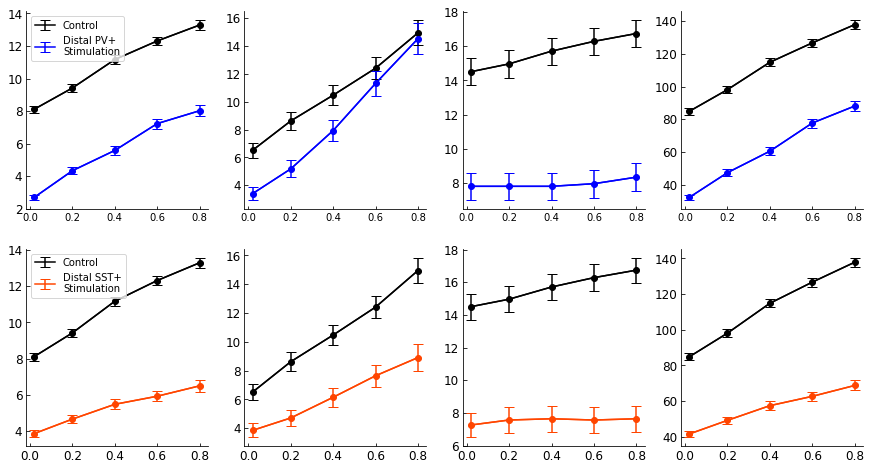

In [688]:
fig, axes = plt.subplots(2,4,figsize = (15,8),gridspec_kw = {'height_ratios':[1,1]})
cont = [0.02,0.2,0.4,0.6,0.8]
# Exc response to PV stim
ax00 = axes[0][0] # left
# ax00.set_title('PC',fontsize=20)
ctrl = ax00.errorbar(cont, ctrlem, yerr = ctrlee, c='black', capsize=5)
ax00.plot(cont,ctrlem,linestyle='-',marker='o',color='black',label='control')
chr2 = ax00.errorbar(cont, chrpvem, yerr = chrpvee, c='blue', capsize=5)
# ax00.set_xticks([])
ax00.tick_params(axis='y',labelsize=12)
ax00.plot(cont,chrpvem,linestyle='-',marker='o',color='blue',label='high ChR2')    
# ax00.set_ylabel('firing rate (Hz)',fontsize=18)
ax00.legend((ctrl, chr2), ('Control', 'Distal PV+\nStimulation'), loc='upper left', shadow=False)

# PV response to PV stim
ax01 = axes[0][1] # middle
# ax01.set_title('PV',fontsize=20)
ax01.errorbar(cont, ctrlpm, yerr = ctrlpe, c='black', capsize=5)
ax01.plot(cont,ctrlpm,linestyle='-',marker='o',color='black',label='control')
#ax01.errorbar(cont, PVdata['chr5pvMeans'], yerr = PVdata['chr5pvSEMs'], c='blue', capsize=5)
#ax01.plot(cont,PVdata['chr5pvMeans'],linestyle='-',marker='o',color='blue',label='low ChR2')
ax01.errorbar(cont, chrpvpm, yerr = chrpvpe, c='blue', capsize=5)
ax01.plot(cont,chrpvpm,linestyle='-',marker='o',color='blue',label='high ChR2')
# ax01.set_xticks([])
ax01.tick_params(axis='y',labelsize=12)

# SOM response to PV stim
ax02 = axes[0][2] # right
# ax02.set_title('SST',fontsize=20)
ax02.errorbar(cont, ctrlsm, yerr = ctrlse, c='black', capsize=5)
ax02.plot(cont,ctrlsm,linestyle='-',marker='o',color='black',label='control')
#ax02.errorbar(cont, PVdata['chr5somMeans'], yerr = PVdata['chr5somSEMs'], c='blue', capsize=5)
#ax02.plot(cont,PVdata['chr5somMeans'],linestyle='-',marker='o',color='blue',label='low ChR2')
ax02.errorbar(cont, chrpvsm, yerr = chrpvse, c='blue', capsize=5)
ax02.plot(cont,chrpvsm,linestyle='-',marker='o',color='blue',label='high ChR2')
# ax02.set_xticks([])
ax02.tick_params(axis='y',labelsize=12)

# Population response to PV stim
ax03 = axes[0][3] # right
# ax03.set_title('Population',fontsize=20)
ax03.errorbar(cont, np.array(ctrlam)*10, yerr = np.array(ctrlae)*10, c='black', capsize=5)
ax03.plot(cont, np.array(ctrlam)*10,linestyle='-',marker='o',color='black',label='control')
#ax02.errorbar(cont, PVdata['chr5somMeans'], yerr = PVdata['chr5somSEMs'], c='blue', capsize=5)
#ax02.plot(cont,PVdata['chr5somMeans'],linestyle='-',marker='o',color='blue',label='low ChR2')
ax03.errorbar(cont, np.array(chrpvam)*10, yerr = np.array(chrpvae)*10, c='blue', capsize=5)
ax03.plot(cont,np.array(chrpvam)*10,linestyle='-',marker='o',color='blue',label='high ChR2')
# ax03.set_xticks([])
ax03.tick_params(axis='y',labelsize=12)

# Exc response to SOM stim
ax10 = axes[1][0] # bottom left
ctrl = ax10.errorbar(cont, ctrlem, yerr = ctrlee, c='black', capsize=5)
ax10.plot(cont, ctrlem,linestyle='-',marker='o',color='black',label='control')
#ax10.errorbar(cont, SOMdata['chr5excMeans'], yerr = SOMdata['chr5excSEMs'], c='darkorange', capsize=5)
#ax10.plot(cont,SOMdata['chr5excMeans'],linestyle='-',marker='o',color='darkorange',label='low ChR2')
chr2 = ax10.errorbar(cont, chrsstem, yerr = chrsstee, c='orangered', capsize=5)
ax10.plot(cont,chrsstem,linestyle='-',marker='o',color='orangered',label='high ChR2')
ax10.tick_params(axis='y',labelsize=12)
ax10.tick_params(axis='x',labelsize=12)
#ax10.set_xticks([.0,.2,.4,.6,.8,1],['0.0','0.2','0.4','0.6','0.8','1.0'])
# ax10.set_xlabel('contrast',fontsize=18)
# ax10.set_ylabel('firing rate (Hz)',fontsize=18)
ax10.legend((ctrl, chr2), ('Control', 'Distal SST+\nStimulation'), loc='upper left', shadow=False)


# PV response to SOM stim
ax11 = axes[1][1] # bottom middle
ax11.tick_params(axis='y',labelsize=12)
ax11.tick_params(axis='x',labelsize=12)
#ax11.set_xticks([.0,.2,.4,.6,.8,1],['0.0','0.2','0.4','0.6','0.8','1.0'])
# ax11.set_xlabel('contrast',fontsize=18)
ax11.errorbar(cont, ctrlpm, yerr = ctrlpe, c='black', capsize=5)
ax11.plot(cont,ctrlpm,linestyle='-',marker='o',color='black',label='control')
#ax11.errorbar(cont, SOMdata['chr5pvMeans'], yerr = SOMdata['chr5pvSEMs'], c='darkorange', capsize=5)
#ax11.plot(cont,SOMdata['chr5pvMeans'],linestyle='-',marker='o',color='orange',label='low ChR2')
ax11.errorbar(cont, chrsstpm, yerr = chrsstpe, c='orangered', capsize=5)
ax11.plot(cont,chrsstpm,linestyle='-',marker='o',color='orangered',label='high ChR2')

# SOM response to SOM stim
ax12 = axes[1][2] # bottom right
ax12.tick_params(axis='y',labelsize=12)
ax12.tick_params(axis='x',labelsize=12)
# ax12.set_xticks([.0,.2,.4,.6,.8,1],['0.0','0.2','0.4','0.6','0.8','1.0'])
# ax12.set_xlabel('contrast',fontsize=18)
ax12.errorbar(cont, ctrlsm, yerr = ctrlse, c='black', capsize=5)
ax12.plot(cont,ctrlsm,linestyle='-',marker='o',color='black',label='control')
#ax12.errorbar(cont, SOMdata['chr5somMeans'], yerr = SOMdata['chr5somSEMs'], c='darkorange', capsize=5)
#ax12.plot(cont,SOMdata['chr5somMeans'],linestyle='-',marker='o',color='darkorange',label='low ChR2')
ax12.errorbar(cont, chrsstsm, yerr = chrsstse, c='orangered', capsize=5)
ax12.plot(cont,chrsstsm,linestyle='-',marker='o',color='orangered',label='high ChR2')
# ax12.set_ylim(0,10)

# Population response to SOM stim
ax13 = axes[1][3] # bottom right
ax13.tick_params(axis='y',labelsize=12)
ax13.tick_params(axis='x',labelsize=12)
# ax12.set_xticks([.0,.2,.4,.6,.8,1],['0.0','0.2','0.4','0.6','0.8','1.0'])
# ax13.set_xlabel('contrast',fontsize=18)
ax13.errorbar(cont, np.array(ctrlam)*10, yerr = np.array(ctrlae)*10, c='black', capsize=5)
ax13.plot(cont,np.array(ctrlam)*10,linestyle='-',marker='o',color='black',label='control')
#ax12.errorbar(cont, SOMdata['chr5somMeans'], yerr = SOMdata['chr5somSEMs'], c='darkorange', capsize=5)
#ax12.plot(cont,SOMdata['chr5somMeans'],linestyle='-',marker='o',color='darkorange',label='low ChR2')
ax13.errorbar(cont, np.array(chrsstam)*10, yerr = np.array(chrsstae)*10, c='orangered', capsize=5)
ax13.plot(cont,np.array(chrsstam)*10,linestyle='-',marker='o',color='orangered',label='high ChR2')

for ali in axes:
    for ax in ali:
        ax.tick_params(direction='in', which='both')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
#         ax.set_yticklabels([])
#         ax.set_xticklabels([])
        
savefig=True
if savefig:
    plt.savefig('figb.png',bbox_inches='tight',dpi=200)

plt.show()

In [463]:
def get_ordered_list(positions):
    nunits = positions.shape[1]
    print(nunits,'units')
    togo = []
    for ni in range(nunits):
        pos_x, pos_y, pos_z = positions[:,ni]
        dist = np.sqrt((0.5-pos_x)**2 + (0.5-pos_y)**2)
        togo.append([dist,ni])
        
    togo.sort()
    togo = np.array(togo)
    return togo[:,1].astype(int),togo[:,0]

v19_distal_0.1_SOM_0.2_0.6/all_spikes.pickle
8000 units
1000 units
1000 units


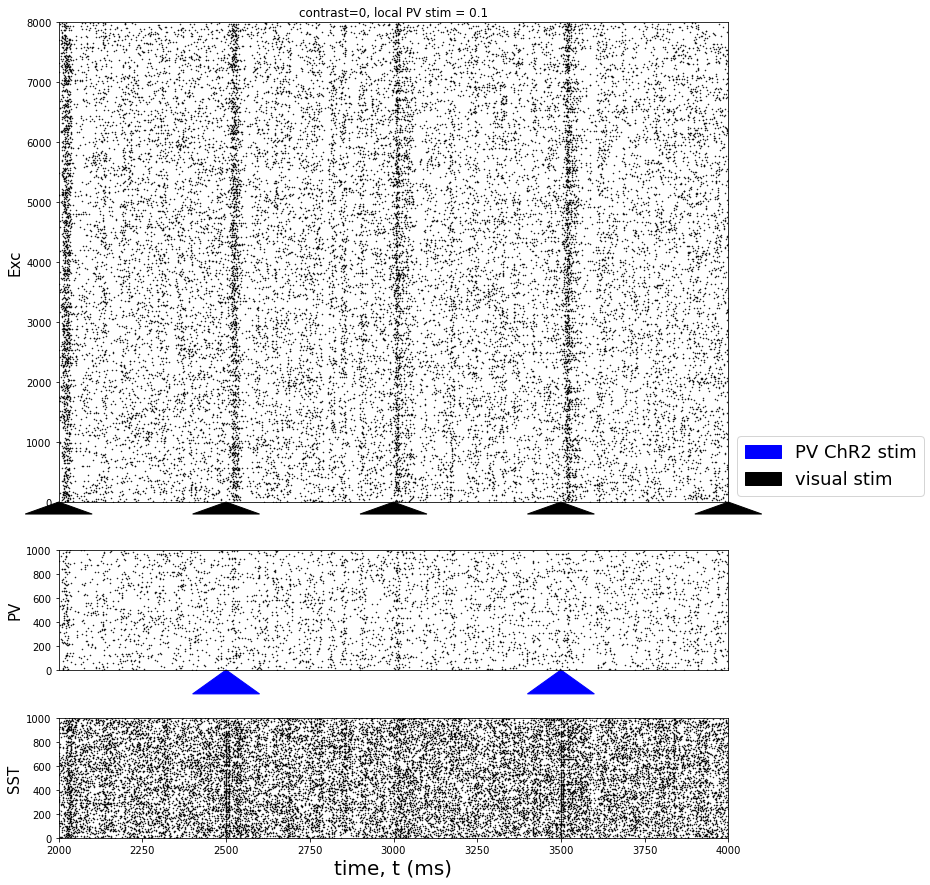

In [501]:
filedir = 'v21_distal_0.1_SOM_0.2_0.6'
# filedir = '../trial8/v4_distal_1.5_PV_0.015_0.15'
#filedir = '0.0_PV_'+'%s'%stimstr
#filedir = '%.1f'%stimstr
with open('%s/all_spikes.pickle'%filedir, 'rb') as file:
    all_spikes = pickle.load(file)
print('%s/all_spikes.pickle'%filedir)

import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='blue', label='PV ChR2 stim')
black_patch = mpatches.Patch(color='black', label='visual stim')

tmax = 4000
tmin = 2000
order = 1000

exc_positions = np.load('%s/exc_positions.npy'%filedir)
exc_order,exc_dists = get_ordered_list(exc_positions)

# test out plotting code   
fig, axes = plt.subplots(3,1,figsize = (12,15),gridspec_kw = {'height_ratios':[4,1,1]})

ax0 = axes[0]
ax0.set_title('contrast=0, local PV stim = 0.1')
ax0.set_ylabel('Exc',fontsize=15)
ax0.set_xticks([])
ax0.set_ylim([0,8*order])
ax0.set_xlim([tmin,tmax])
for i in exc_order:
    spikeTimes = all_spikes[:8*order][i][all_spikes[:8*order][i]<tmax]
    spikeTimes = spikeTimes[spikeTimes>tmin]
    index = i*np.ones(len(spikeTimes))
    ax0.plot(spikeTimes, index, linestyle='',marker='o', color='black',markersize=0.5)
ax0.add_patch(plt.Polygon((np.array([[1900,-200],[2000,0],[2100,-200]])),clip_on=False,color='black'))
ax0.add_patch(plt.Polygon((np.array([[2400,-200],[2500,0],[2600,-200]])),clip_on=False,color='black'))
ax0.add_patch(plt.Polygon((np.array([[2900,-200],[3000,0],[3100,-200]])),clip_on=False,color='black'))
ax0.add_patch(plt.Polygon((np.array([[3400,-200],[3500,0],[3600,-200]])),clip_on=False,color='black'))
ax0.add_patch(plt.Polygon((np.array([[3900,-200],[4000,0],[4100,-200]])),clip_on=False,color='black'))

pv_positions = np.load('%s/pv_positions.npy'%filedir)
pv_order,pv_dists = get_ordered_list(pv_positions)

ax1 = axes[1]
ax1.set_xlim([tmin,tmax])
ax1.set_ylim([0,order])
ax1.set_ylabel('PV',fontsize=15)
ax1.set_xticks([])
for i in pv_order:
    spikeTimes = all_spikes[8*order:9*order][i][all_spikes[8*order:9*order][i]<tmax]
    spikeTimes = spikeTimes[spikeTimes>tmin]
    index = i*np.ones(len(spikeTimes))
    ax1.plot(spikeTimes, index, linestyle='',marker='o', color='black',markersize=0.5)
ax1.add_patch(plt.Polygon((np.array([[2400,-200],[2500,0],[2600,-200]])),clip_on=False,color='blue'))
ax1.add_patch(plt.Polygon((np.array([[3400,-200],[3500,0],[3600,-200]])),clip_on=False,color='blue'))
ax1.legend(handles=[blue_patch,black_patch], loc='center left', bbox_to_anchor=(1, 1.7), fontsize=18)

som_positions = np.load('%s/pv_positions.npy'%filedir)
som_order,som_dists = get_ordered_list(som_positions)

ax2 = axes[2]
ax2.set_ylim([0,order])
ax2.set_xlim([tmin,tmax])
ax2.set_ylabel('SST',fontsize=15)
ax2.set_xlabel('time, t (ms)',fontsize=20)
for i in som_order:
    spikeTimes = all_spikes[9*order:][i][all_spikes[9*order:][i]<tmax]
    spikeTimes = spikeTimes[spikeTimes>tmin]
    index = i*np.ones(len(spikeTimes))
    ax2.plot(spikeTimes, index, linestyle='',marker='o', color='black',markersize=0.5)
    


plt.show()

v14_distal_0.16_SOM_0.15_0.3/all_spikes.pickle


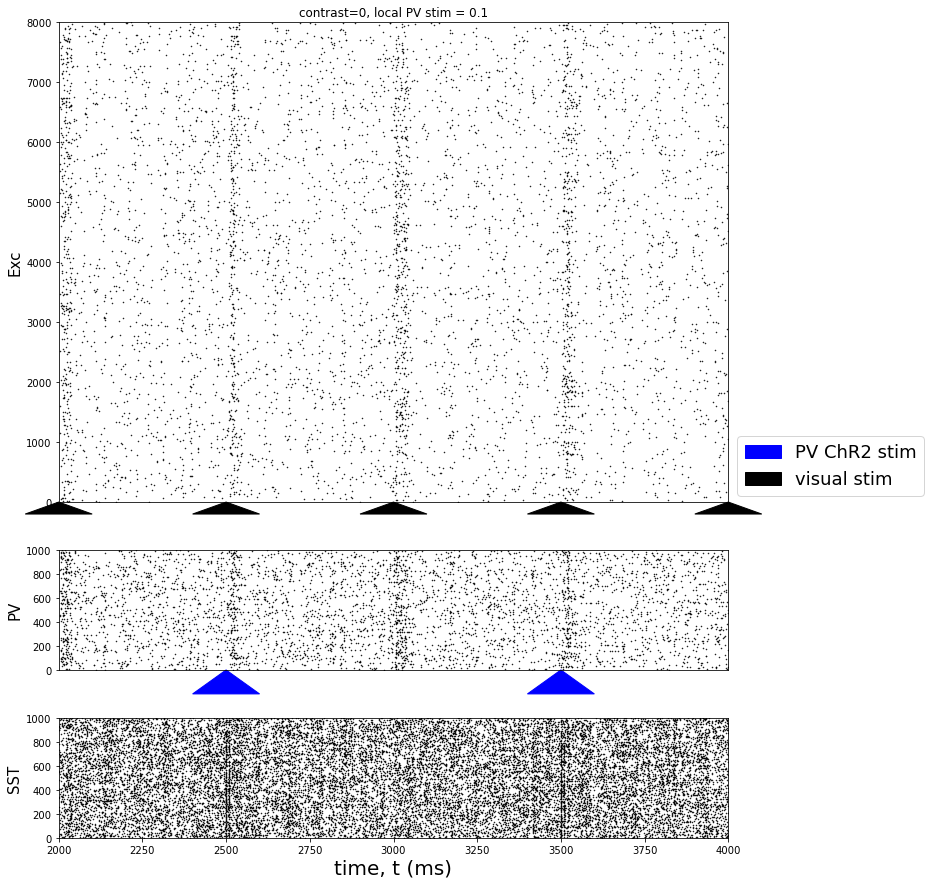

In [368]:
filedir = 'v14_distal_0.1_SOM_0.15_0.3'
# filedir = '../trial8/v4_distal_1.5_PV_0.015_0.15'
#filedir = '0.0_PV_'+'%s'%stimstr
#filedir = '%.1f'%stimstr
with open('%s/all_spikes.pickle'%filedir, 'rb') as file:
    all_spikes = pickle.load(file)
print('%s/all_spikes.pickle'%filedir)

import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='blue', label='PV ChR2 stim')
black_patch = mpatches.Patch(color='black', label='visual stim')

tmax = 4000
tmin = 2000
order = 1000

# test out plotting code   
fig, axes = plt.subplots(3,1,figsize = (12,15),gridspec_kw = {'height_ratios':[4,1,1]})

ax0 = axes[0]
ax0.set_title('contrast=0, local PV stim = 0.1')
ax0.set_ylabel('Exc',fontsize=15)
ax0.set_xticks([])
ax0.set_ylim([0,8*order])
ax0.set_xlim([tmin,tmax])
for i in range(8*order):
    spikeTimes = all_spikes[:8*order][i][all_spikes[:8*order][i]<tmax]
    spikeTimes = spikeTimes[spikeTimes>tmin]
    index = i*np.ones(len(spikeTimes))
    ax0.plot(spikeTimes, index, linestyle='',marker='o', color='black',markersize=0.5)
ax0.add_patch(plt.Polygon((np.array([[1900,-200],[2000,0],[2100,-200]])),clip_on=False,color='black'))
ax0.add_patch(plt.Polygon((np.array([[2400,-200],[2500,0],[2600,-200]])),clip_on=False,color='black'))
ax0.add_patch(plt.Polygon((np.array([[2900,-200],[3000,0],[3100,-200]])),clip_on=False,color='black'))
ax0.add_patch(plt.Polygon((np.array([[3400,-200],[3500,0],[3600,-200]])),clip_on=False,color='black'))
ax0.add_patch(plt.Polygon((np.array([[3900,-200],[4000,0],[4100,-200]])),clip_on=False,color='black'))

ax1 = axes[1]
ax1.set_xlim([tmin,tmax])
ax1.set_ylim([0,order])
ax1.set_ylabel('PV',fontsize=15)
ax1.set_xticks([])
for i in range(1000):
    spikeTimes = all_spikes[8*order:9*order][i][all_spikes[8*order:9*order][i]<tmax]
    spikeTimes = spikeTimes[spikeTimes>tmin]
    index = i*np.ones(len(spikeTimes))
    ax1.plot(spikeTimes, index, linestyle='',marker='o', color='black',markersize=0.5)
ax1.add_patch(plt.Polygon((np.array([[2400,-200],[2500,0],[2600,-200]])),clip_on=False,color='blue'))
ax1.add_patch(plt.Polygon((np.array([[3400,-200],[3500,0],[3600,-200]])),clip_on=False,color='blue'))
ax1.legend(handles=[blue_patch,black_patch], loc='center left', bbox_to_anchor=(1, 1.7), fontsize=18)

ax2 = axes[2]
ax2.set_ylim([0,order])
ax2.set_xlim([tmin,tmax])
ax2.set_ylabel('SST',fontsize=15)
ax2.set_xlabel('time, t (ms)',fontsize=20)
for i in range(1000):
    spikeTimes = all_spikes[9*order:][i][all_spikes[9*order:][i]<tmax]
    spikeTimes = spikeTimes[spikeTimes>tmin]
    index = i*np.ones(len(spikeTimes))
    ax2.plot(spikeTimes, index, linestyle='',marker='o', color='black',markersize=0.5)
    


plt.show()